#                             Exploratory Data Analysis (EDA) 

Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:
1.How many are there in each Team and the percentage splitting with respect to the total employees.
2.Segregate the employees w.r.t different positions.
3.Find from which age group most of the employees belong to.
4.Find out under which team and position, spending in terms of salary is high.
5.Find if there is any correlation between age and salary , represent it visually.

In [3]:
# importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# data from an excel file is converted to a dataframe using pandas
df= pd.read_excel("myexcel.xlsx")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [5]:
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,2023-09-06 00:00:00,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,2023-08-06 00:00:00,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,7-0,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,2023-02-06 00:00:00,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,2023-04-06 00:00:00,220,Oklahoma State,3431040.0


In [3]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,2023-03-07 00:00:00,231,Kansas,947276.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [7]:
# statistical summary of data
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [10]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [9]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

### Data pre processing

In [19]:
#column height is having incorrect data, so changing the data with any random numbers between 150 and 180.
df['Height'] = np.random.randint(150, 180,len(df))
df['Height']
# saving the pre processed data to csv format
df.to_csv('Dataset.csv')

### 1. How many are there in each Team and the percentage splitting with respect to the total employees?

In [15]:
each_team_count=df['Team'].value_counts()
print("Number of employees in each team  : \n")
print(each_team_count)
team_count_Percentage=round((each_team_count/len(df))*100,2)
print("\nPercentage splitting with respect to the total employees : \n")
print(team_count_Percentage)

Number of employees in each team  : 

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage splitting with respect to the total employees : 


### 2. Segregate the employees w.r.t different positions.

In [32]:
df['Position'].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

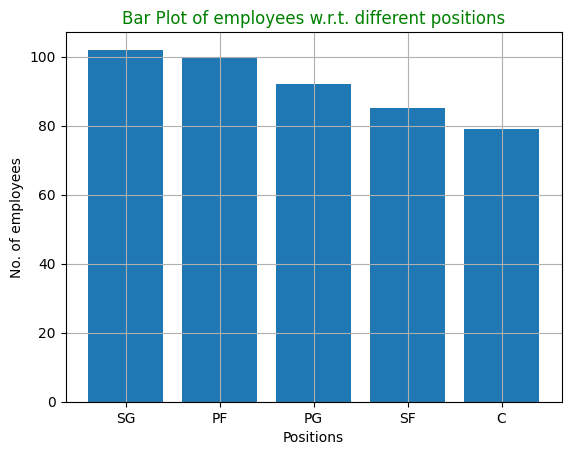

In [37]:
# Data visualization
positions=['SG','PF','PG','SF','C']
count=[102,100,92,85,79]
plt.bar(positions,count)
plt.grid(True)
plt.xlabel('Positions')
plt.ylabel('No. of employees')
plt.title('Bar Plot of employees w.r.t. different positions',color='g')
plt.show()

Data story:
Most of the employees belong to the SG position and position C has minimum number of employees

### 3. Find from which age group most of the employees belong to ?

In [39]:
df['Age'].value_counts()

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

Data Story: 
Here highest no. of employees ie. 47 employees have an age of 24.It is observed that most of the employees belongs to an age
group of 23 to 27. Minimum no. of employees comes under the age group of below 20 and above 40. 

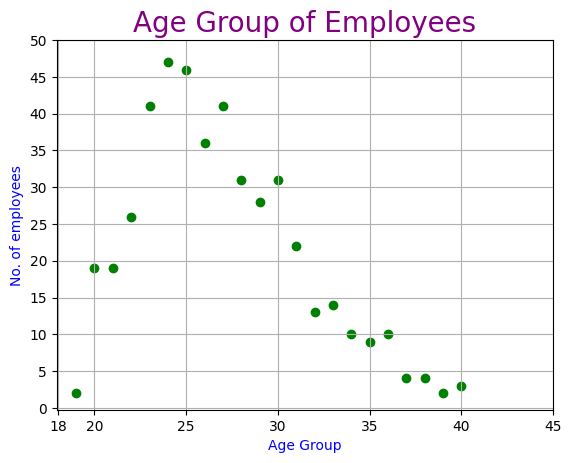

In [21]:
# Data Visualization
plt.title('Age Group of Employees',fontdict={'fontsize':20,'color':'purple'})
plt.scatter(df['Age'].value_counts().index,df['Age'].value_counts().values,color='g')
plt.xticks([18,20,25,30,35,40,45])
plt.yticks([0,5,10,15,20,25,30,35,40,45,50])
plt.grid(True)
plt.xlabel('Age Group',color='b')
plt.ylabel('No. of employees',color='b')
plt.show()

Data story: 
Most of the employees belongs 23 to 25 age group. Highest no. of employees ie. 47 employees have an age of 24.

### 4. Find out under which team and position, spending in terms of salary is high?

In [7]:
# to get amount spending in terms of salary for each team and position
high_salary_team_position = df.groupby(['Team', 'Position'])['Salary'].sum()
high_salary_team_position.head(10)

Team            Position
Atlanta Hawks   C           22756250.0
                PF          23952268.0
                PG           9763400.0
                SF           6000000.0
                SG          10431032.0
Boston Celtics  C            7351395.0
                PF          18170960.0
                PG          19898606.0
                SF           6796117.0
                SG           6323990.0
Name: Salary, dtype: float64

In [113]:
high_salary_team_position.tail(30)

Team                    Position
Portland Trail Blazers  C           13412322.0
                        PF           6238693.0
                        PG           7091227.0
                        SF          10936954.0
                        SG          10622622.0
Sacramento Kings        C           26950230.0
                        PF           1370152.0
                        PG          14513559.0
                        SF          17669822.0
                        SG          11179903.0
San Antonio Spurs       C           14897276.0
                        PF          21188187.0
                        PG          17267197.0
                        SF          17550380.0
                        SG          13539693.0
Toronto Raptors         C            9316482.0
                        PF          11913852.0
                        PG          20509360.0
                        SF          18677917.0
                        SG          10700000.0
Utah Jazz               C  

In [108]:
# To get which team and position, spending in terms of salary is high :
high_salary_team_position = df.groupby(['Team', 'Position'])['Salary'].sum().idxmax()
print("Team:", high_salary_team_position[0])
print("Position:", high_salary_team_position[1])

Team: Los Angeles Lakers
Position: SF


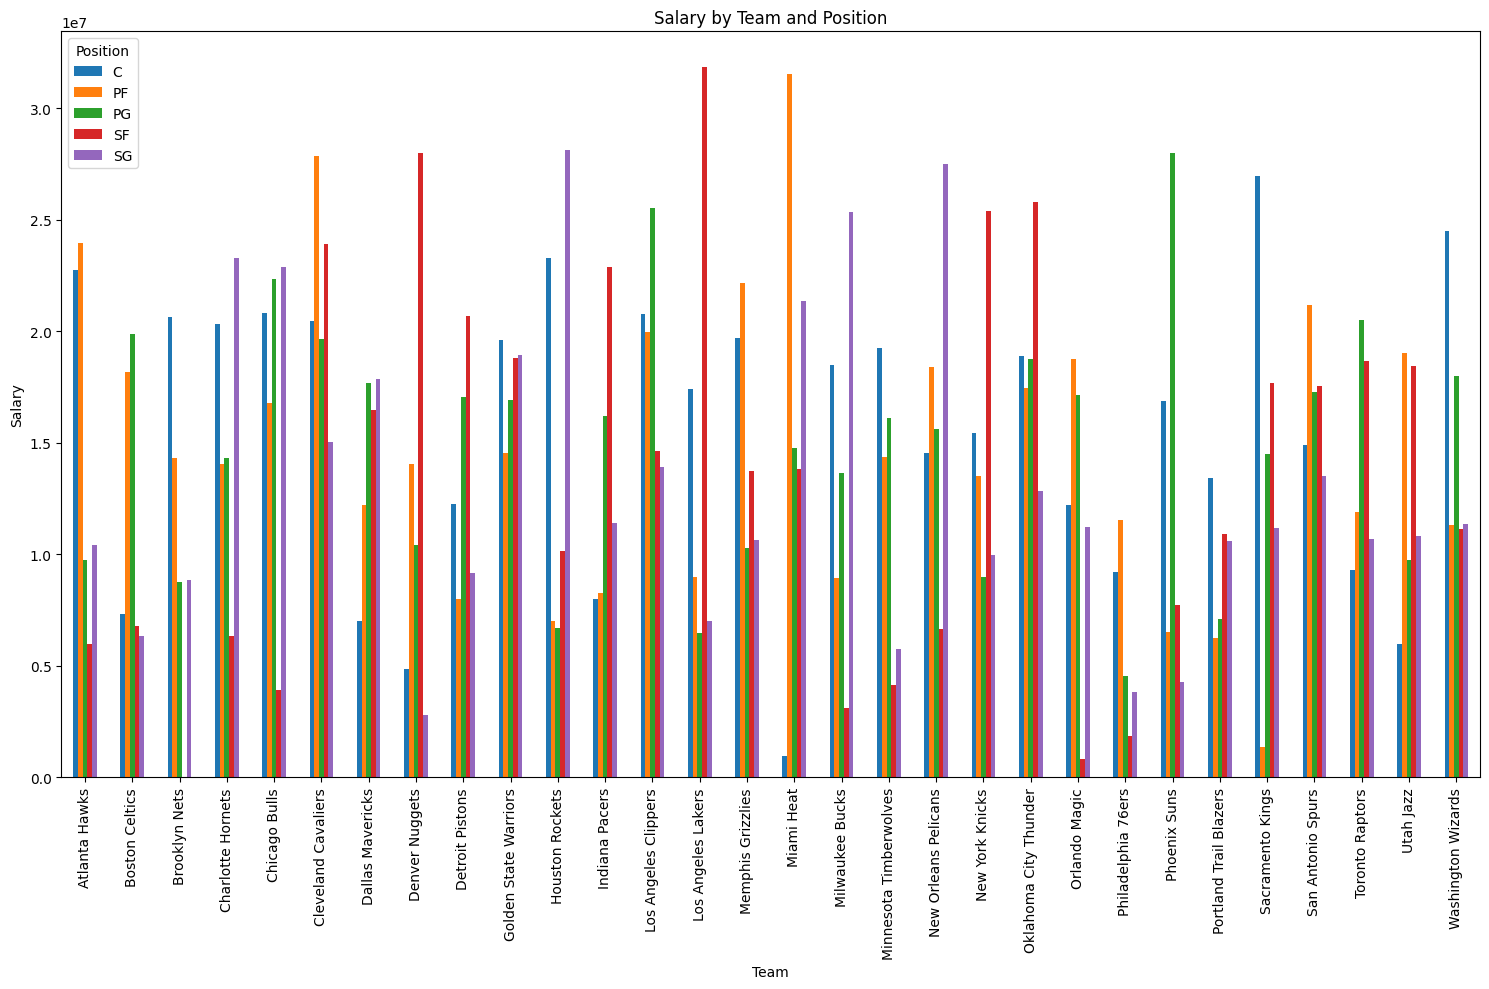

In [17]:
# Data Visualization

# unstack the multi_index series to create a dataframe
high_salary=high_salary_team_position.unstack()

#plotting
axises=high_salary.plot(kind='bar',figsize=(15,10))
axises.set_xlabel('Team')
axises.set_ylabel('Salary')
axises.set_title('Salary by Team and Position')
plt.legend(title='Position',loc='upper left')
plt.tight_layout()
plt.show()

Data story:
Above graph shows position SF in team Los Angeles Lakers spending the highest salary.The team Miami Heat and position PF is in second place in spending the highest salary.Team Philadelphia 76ers spending minimum amount in terms of salary compared to others. Position C in team Miami Heat and position SF in team Orlando Magic spending the lowest salary.F

### 5.Find if there is any correlation between age and salary , represent it visually.

Correlation Matrix between age and salary :
             Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


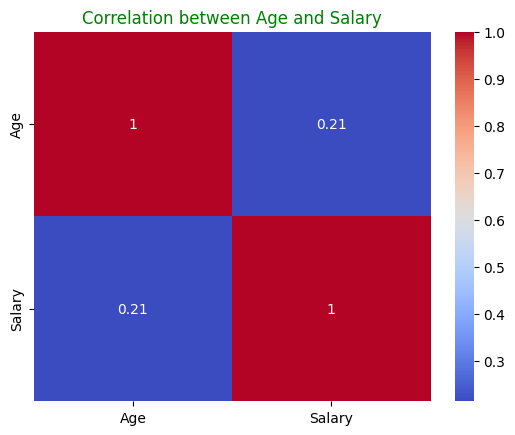

In [77]:
correlation = df[['Age', 'Salary']].corr()
print("Correlation Matrix between age and salary :")
print(correlation)
# Visual representation of correlation
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title('Correlation between Age and Salary',color='g')
plt.show()

Correlation Matrix shows that there is a weak positive correlation between age and salary with a value of  0.2140. But age is not the most significant factor in getting the salary, other factors could influence 
the relationship between age and salary.000

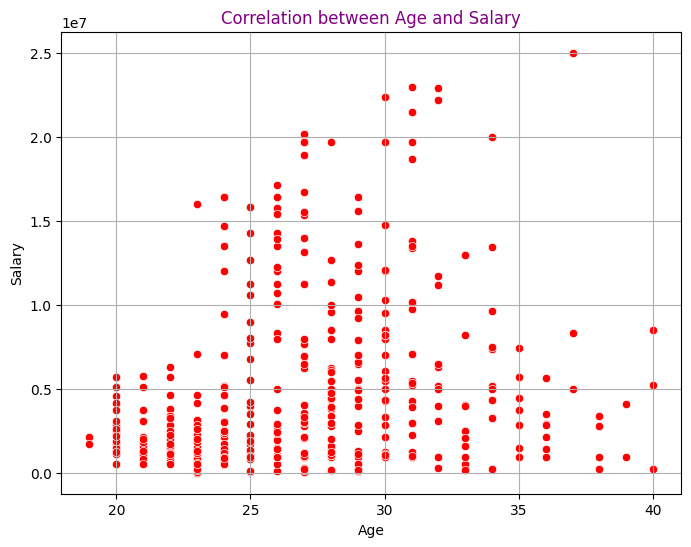

In [52]:
# Data visualization - plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df, color='r')
plt.grid(True)
plt.title('Correlation between Age and Salary',color='purple')
plt.show()

Data story: 
Employees have been getting high salaries belonging to the 27 to 34 age group. Employee with highest salary belongs to an 
age of 37 but it is an outlier value.As well as age groups below 20 and above 40 is minimal so it can be considered as an 
outlier values. Most of the employees ages between 23  and 34 are getting lowest salary. So we can conclude that But age 
is not the most significant factor in getting the salary.

### Conclusion:

Overall, this analysis provides insights into the composition of employees in each team, their positions, age distribution, salary spending, and the relationship between age and salary. This information can help ABC company in making informed decisions regarding team management, salary structure, and human resource planning.